# Titanic: Machine Learning from Disaster 

Business Problem: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

** What we want to do: **
We want to complete the analysis of what sorts of people were likely to survive. Using machine learning to predict which passengers survived the tragedy. 

# Step 1: Importing the data

In [1]:
# import some useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train = pd.read_csv('/Users/Jiaqi/Documents/Data Science/Kaggle/Titanic/train.csv')
test = pd.read_csv('/Users/Jiaqi/Documents/Data Science/Kaggle/Titanic/test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From .info() we can see there are some categorical columns in both the train and test set. For categorical columns, we usually change it to numberical values. We should change them both in train and test set. We can combine training and test set together for data cleaning. 

In [9]:
# combine train and test together 
full = train.append(test, ignore_index=True)

# train set has 891 rows. so we can define the first 891 rows from the full dataset as train set
train_df = full[:891]

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB


# Exploratory Data Analysis

Exploring the training set to: 
1. Understand the data, such as relationships among variables
2. Check if there are missing data. If so, deal with missing data
3. Data processing, such as converting categorical variables to numerical variables

In [11]:
# check the head of the training dataset
train_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


VARIABLE DESCRIPTIONS:

- Survived: Survived (1) or died (0) - numeric
- Pclass: Passenger's class - numeric
- Name: Passenger's name - categorical
- Sex: Passenger's sex - categorical
- Age: Passenger's age - numeric
- SibSp: Number of siblings/spouses aboard - numeric
- Parch: Number of parents/children aboard - numeric
- Ticket: Ticket number - numeric + alphabetical
- Fare: Fare - numeric
- Cabin: Cabin - number + char
- Embarked: Port of embarkation - categorical


In [22]:
# check describe
train_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


Note that Age has 714 counts, but there are 891 rows in the training set. There are some missing values for Age. We should keep this in mind and think of way to deal with missing Age. 

In [24]:
# we can also use describe to check for categorical columns 
train_df.describe(include = ['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,204,889,891,891,891
unique,147,3,891,2,681
top,B96 B98,S,"Heininen, Miss. Wendla Maria",male,1601
freq,4,644,1,577,7


In [15]:
# another way to check which column have missing value
train_df.isnull().any()

# we can see Age, Cabin and Embarked have missing value

Age             True
Cabin           True
Embarked        True
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
dtype: bool

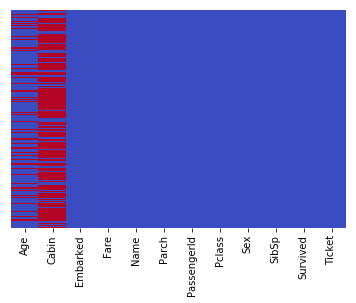

In [25]:
# we can also use heatmap to see which columns have missing data
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar = False,cmap = 'coolwarm')

# a quick heatmap also shows that Age and Cabin are the top two with missing values

From the above analysis, we see that:
- Age: there are 714 counts, that's 714/891 = 80% about 80% of valid values. For the 20% missing value, we can probably use some computational, such as mean to repleace the missing value
- Cabin: there are 204 counts, that's 204/891 = 23% valid data. There are almost 80% missing value, that too many missing values. We probably can drop this column. 

Text(0.5,1,'Training Set Correlation')

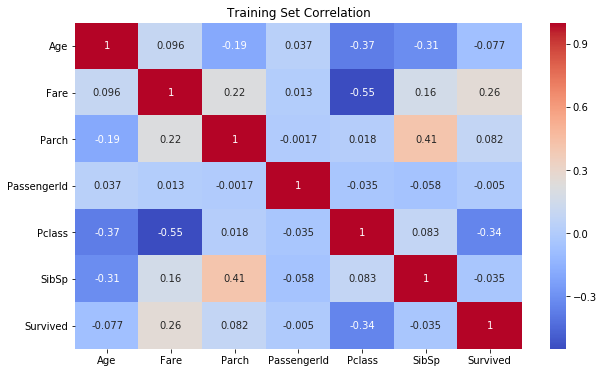

In [34]:
# check the correlation among all variables to try to find out which variables are more important
plt.figure(figsize=(10,6))
sns.heatmap(data=train_df.corr(),annot=True, cmap = 'coolwarm')
plt.title('Training Set Correlation')

** Further explore the variables and survivial relationshop  **

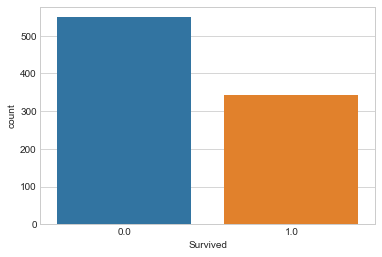

In [37]:
# see distribution of survival 
sns.set_style('whitegrid')
sns.countplot(x = train_df['Survived'])

In [59]:
# check how many people survived
print('Number of Survival: ',
    train_df['Survived'][train_df['Survived'] == 1].count())

# check how many people died
print('Number of death: ', train_df['Survived'][train_df['Survived'] == 0].count())


Number of Survival:  342
Number of death:  549


In [61]:
train_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Overall, we know there are 342 people survived, 549 people died in the training set. Survival Rate is about 38.38%

** Explore Age vs. Survival **

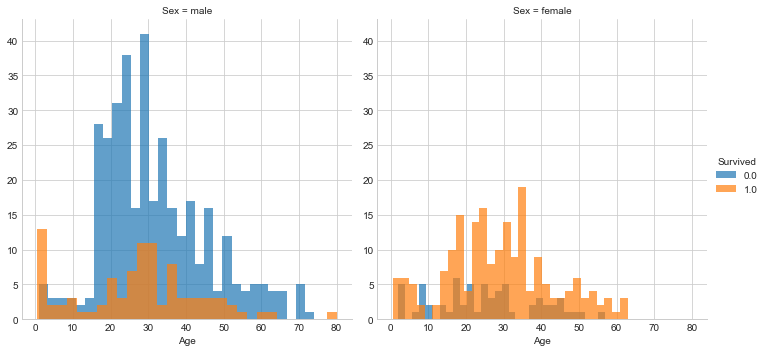

In [85]:
g = sns.FacetGrid(train_df, col="Sex",hue = 'Survived', size = 5)
g = (g.map(plt.hist,"Age", bins = 30, alpha=.7).add_legend())